In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyabc

import os
import seaborn as sns

from matplotlib import rc

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

rc('font', **font)

In [2]:
wsize=256

path = "/home/felipe/testresults/Nils_HIV/"+str(wsize)+"W/"

history_DLA=pyabc.History("sqlite:///" +
                          os.path.join(path, "LATrue",
                                       "HIV_2D_model.db"))

history_ORI=pyabc.History("sqlite:///" +
                          os.path.join(path, "LAFalse",
                                       "HIV_2D_model.db"))

history_DLA.get_all_populations().to_csv(path+"HIVAllPopLA.csv")
history_ORI.get_all_populations().to_csv(path+"HIVAllPopOri.csv")

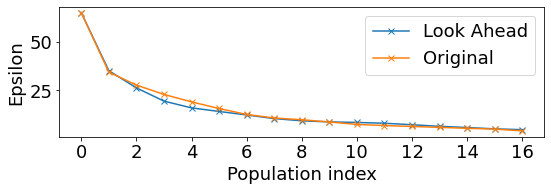

In [3]:
fig, ax = plt.subplots(1,1, figsize=(8,3))

pyabc.visualization.plot_epsilons([history_DLA, history_ORI], labels=["Look Ahead", "Original"], ax=ax)
ax.set_title(None)

#pyabc.visualization.plot_epsilons([history_DLA, history_ORI], labels=["DYNLA", "ORI"], ax=ax[2])
#ax[2].set_yscale("log")
#ax[2].set_ylim(ymin=600,ymax=10000)
fig.tight_layout()
fig.savefig(path+"HIVEpsilons.pdf")

/home/felipe/pyABC/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(X, Y, PDF, **kwargs)
/home/felipe/pyABC/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(X, Y, PDF, **kwargs)
/home/felipe/pyABC/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

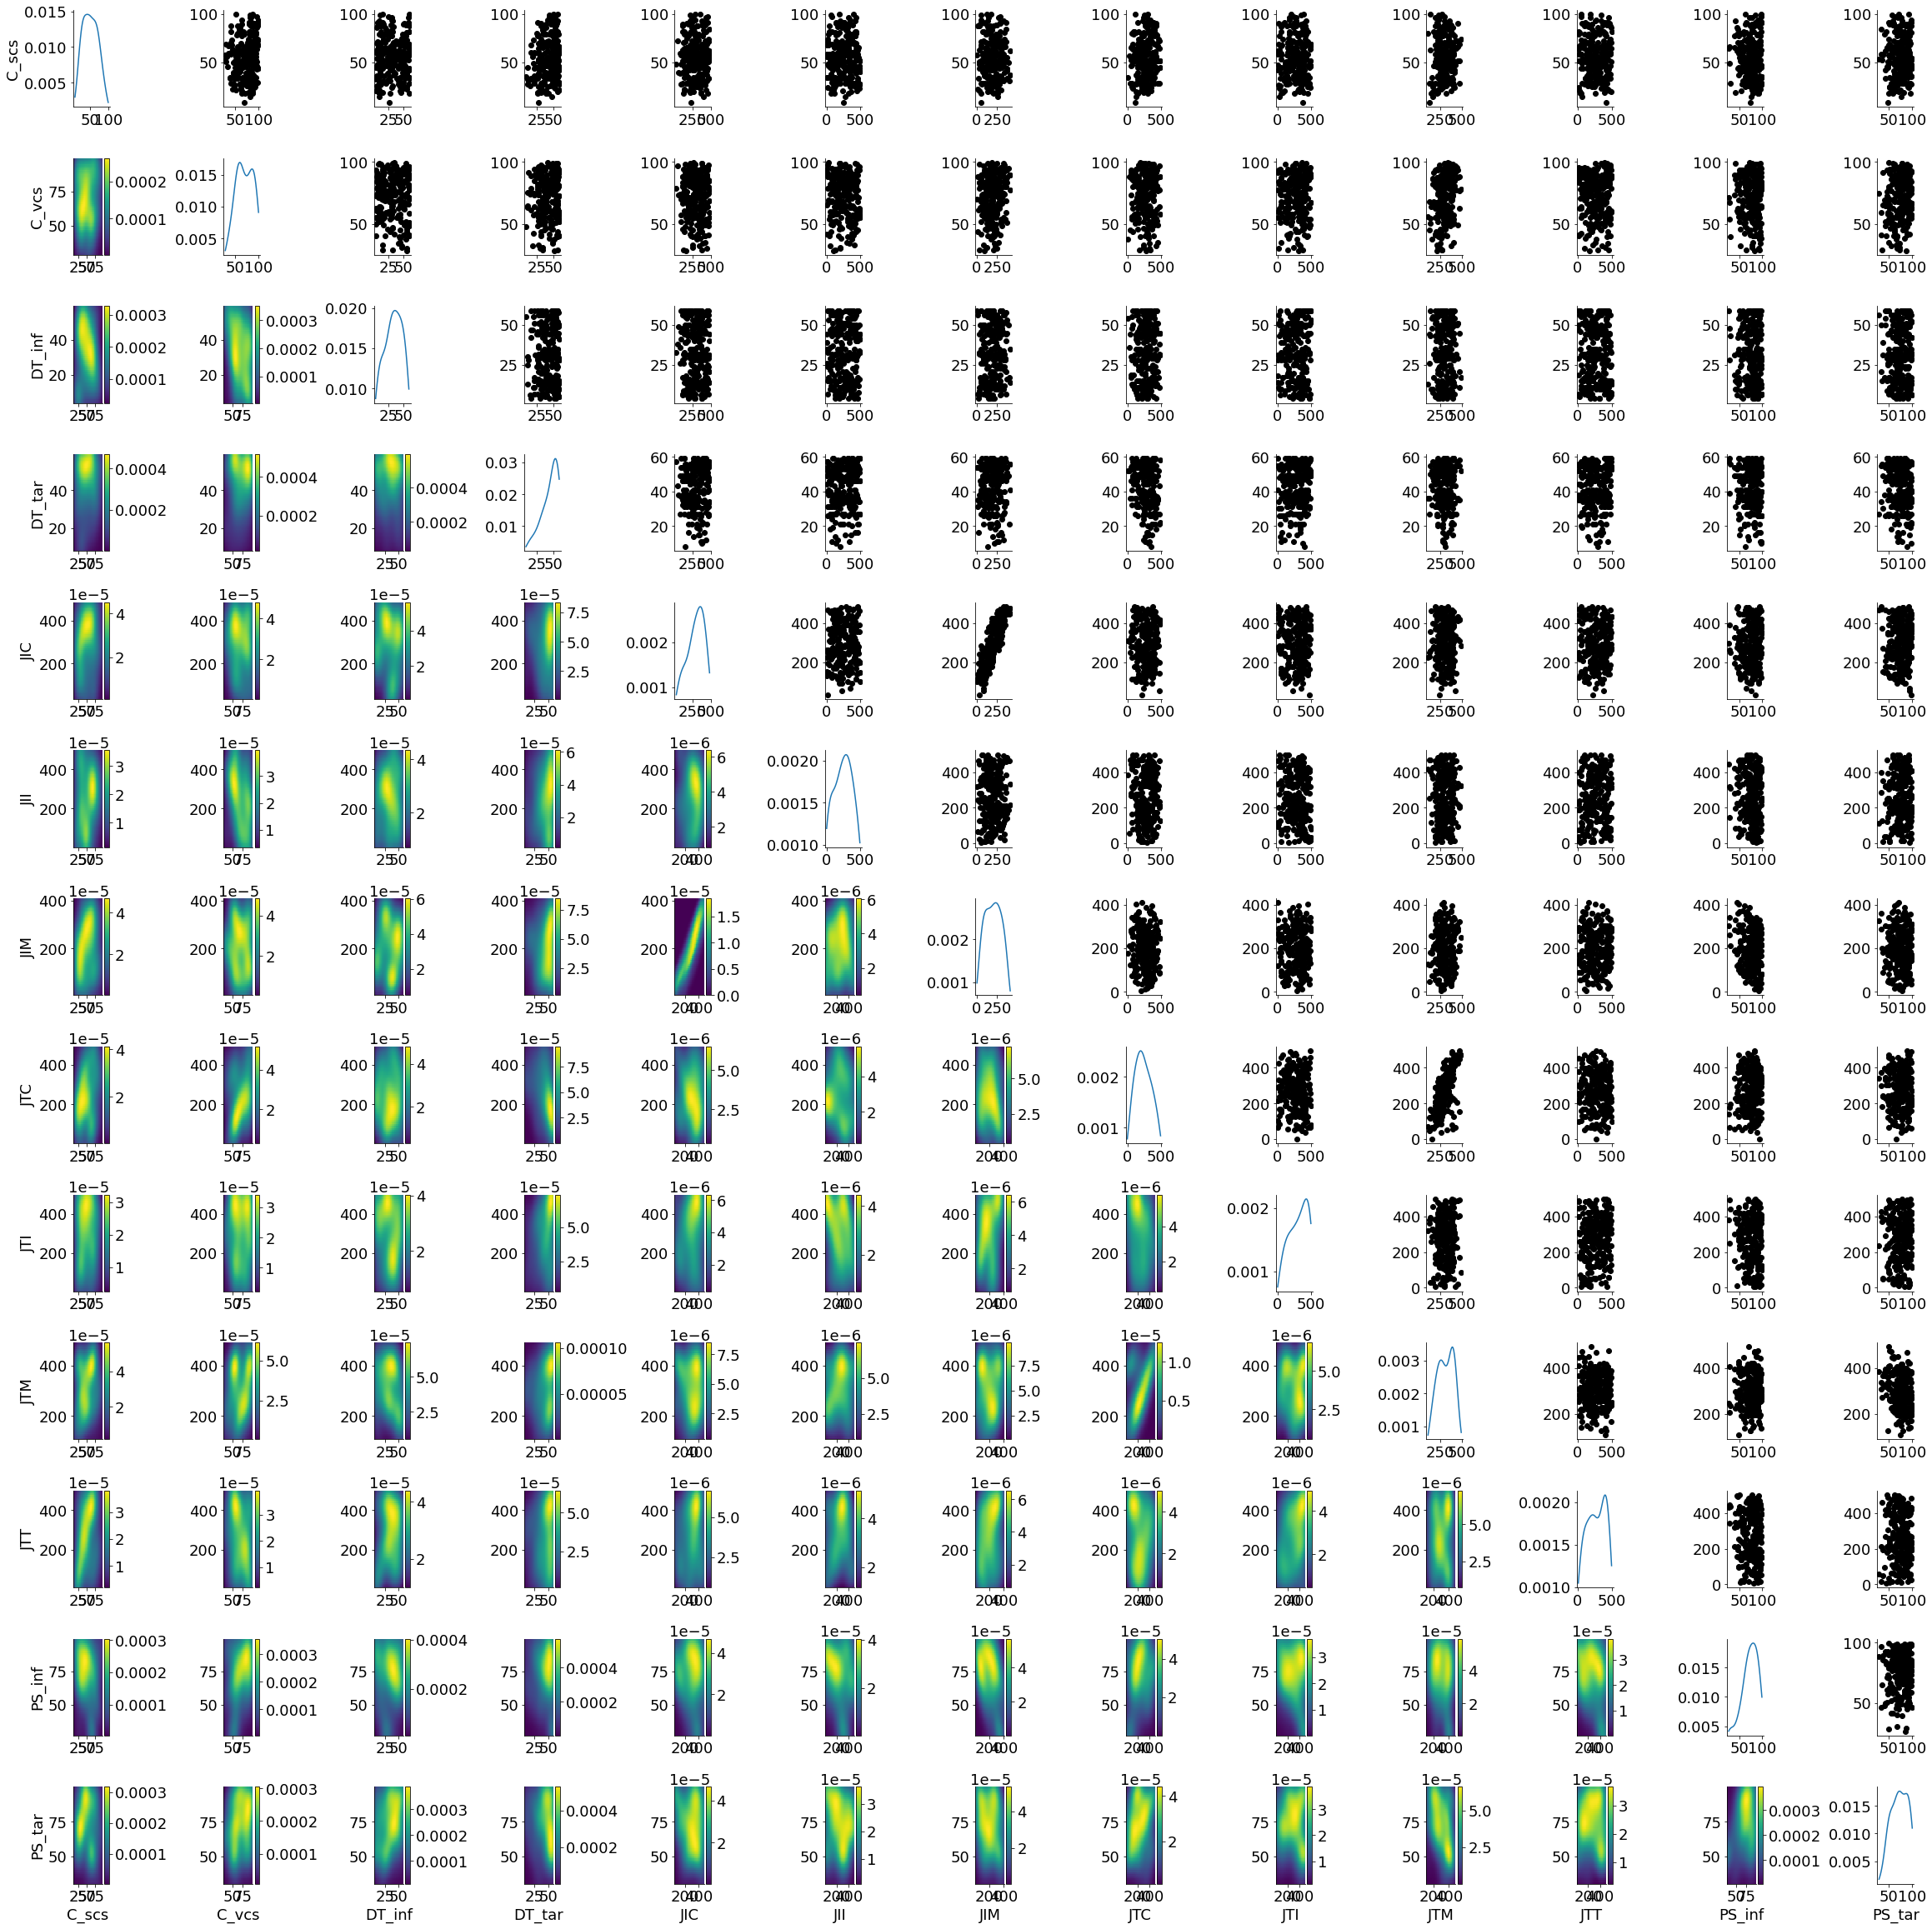

In [11]:
df, w = history_DLA.get_distribution(m=0, t=history_DLA.max_t)
pyabc.visualization.plot_kde_matrix(df, w);


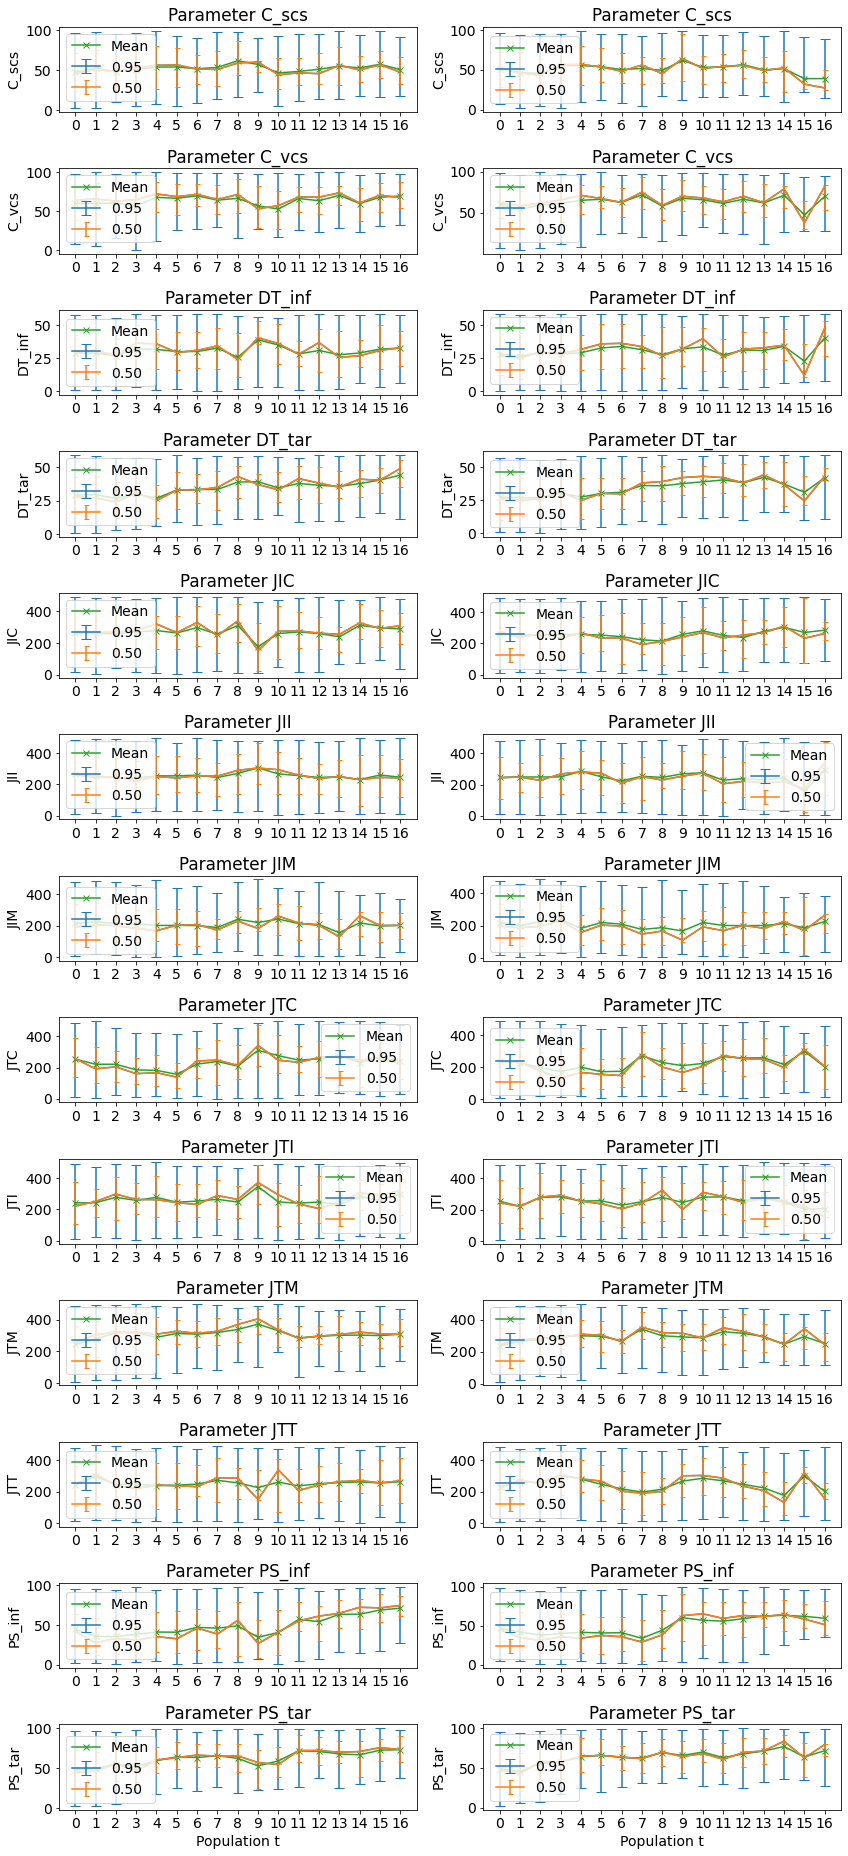

In [13]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}

rc('font', **font)

fig, axes = plt.subplots(13,2, figsize=(12, 26))

xticks = [0]
i=0
while i < len(history_DLA.get_all_populations()):
    i=i+2
    xticks.append(i)
    
    
boundaries=[0,500]

pyabc.visualization.plot_credible_intervals(history_DLA,
                                            levels=[0.95, 0.5],
                                            show_mean=True,
                                            arr_ax = axes[:,0])

pyabc.visualization.plot_credible_intervals(history_ORI,
                                            levels=[0.95, 0.5],
                                            show_mean=True,
                                            arr_ax = axes[:,1])

fig.tight_layout()

fig.savefig(path+"HIVCredibleIntervals.pdf")

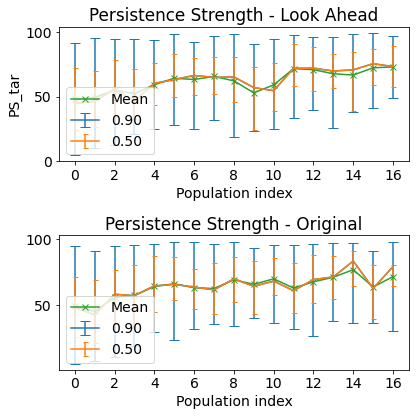

In [6]:
fig, axes = plt.subplots(2,1, figsize=(6, 6))
xticks = [0]
i=0
while i < len(history_DLA.get_all_populations())-2:
    i=i+2
    xticks.append(i)

for i in [6]:
    ax = axes[0]
    
    pyabc.visualization.plot_credible_intervals(
    history_DLA, levels=[0.9, 0.5], par_names=['PS_tar'],
    show_mean=True, arr_ax = ax)
    
    ax.set_title("Persistence Strength - Look Ahead")
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
#    ax.set_ylabel(None)
    ax.set_xlabel("Population index")
    ax.legend(loc=3)
    
    ax = axes[1]
    pyabc.visualization.plot_credible_intervals(
    history_ORI, levels=[0.9, 0.5],  par_names=['PS_tar'],
    show_mean=True, arr_ax = ax)
    ax.set_xlabel("Population index")
    
    ax.set_title("Persistence Strength - Original")
    ax.set_xticks(xticks)
    ax.set_ylabel(None)
    ax.set_xticklabels(xticks)
    ax.legend(loc=3)

fig.tight_layout()

fig.savefig(path+"HIVCI1Par.pdf")

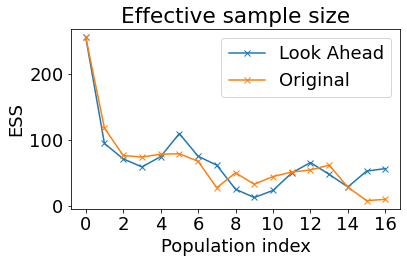

In [7]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

rc('font', **font)

fig, ax = plt.subplots(1,1)

pyabc.visualization.plot_effective_sample_sizes([history_DLA, history_ORI], labels=["Look Ahead", "Original"], ax=ax)

fig.tight_layout()
fig.savefig(path+"HIVEffSampleSize.pdf")

In [8]:
DLADF = history_DLA.get_all_populations()
starttime = DLADF["population_end_time"][0]

new_col=[]
for i in range(0,len(DLADF)):
    new_col.append((DLADF["population_end_time"][i]-DLADF["population_end_time"][0]).total_seconds())
DLADF.insert(2, "time_passed_s", new_col, True)


ORIDF = history_ORI.get_all_populations()
starttime = ORIDF["population_end_time"][0]

new_col=[]
for i in range(0,len(ORIDF)):
    new_col.append((ORIDF["population_end_time"][i]-ORIDF["population_end_time"][0]).total_seconds())
ORIDF.insert(2, "time_passed_s", new_col, True)


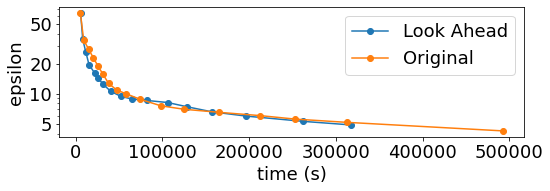

In [9]:
fig, axes = plt.subplots(1,1, figsize=(8,3))

ax = axes

ax.plot(DLADF["time_passed_s"], DLADF["epsilon"], label = "Look Ahead", marker="o")
ax.plot(ORIDF["time_passed_s"], ORIDF["epsilon"], label = "Original", marker="o")

yticks = [5, 10, 20, 50]
ax.set_yscale("log")
ax.set_ylabel("epsilon")
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xlabel("time (s)")
ax.legend()

fig.tight_layout()
fig.savefig(path+"HIVEpsOverTime.pdf")

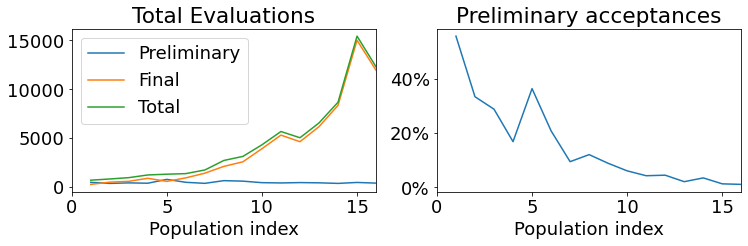

In [10]:
stat_df = pd.read_csv(path+"LATrue/look_ahead.csv")[1:]

fig, axes = plt.subplots(1,2, figsize=(12,3))


ax = axes[0]

ax.plot(stat_df['t'],stat_df['n_lookahead'], label="Preliminary")
ax.plot(stat_df['t'],stat_df['n_evaluated']-stat_df['n_lookahead'], label="Final")
ax.plot(stat_df['t'],stat_df['n_evaluated'], label="Total")

ax.title.set_text("Total Evaluations")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.set_xlabel("Population index")
#ax.set_yscale('log')
ax.legend()


ax = axes[1]

n_lookahead_particles=np.zeros(len(stat_df))
for i in range(len(stat_df)):
    n_lookahead_particles[i]=min(500, stat_df['n_lookahead_accepted'][i+1])/500
    
ax.plot(stat_df['t'], n_lookahead_particles)

ax.title.set_text("Preliminary acceptances")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.set_xlabel("Population index")

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

fig.tight_layout()

fig.savefig(path+"HIVAcceptances.pdf")